# MC-PCA on non-detrended speleothem data

This Jupyter Notebook provides an analysis of speleothem oxygen isotope data using the Monte Carlo Principal Component Analysis (MC-PCA) method.

**Note:** This notebook assumes the existence of pickle files that need to have been created previously. If you are running this notebook on your machine, make sure you've successfully run both of the notebooks in the `Loading Data` folder.

In [7]:
import pickle

from tqdm import tqdm

import pyleoclim as pyleo
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

from matplotlib import cm
from matplotlib.gridspec import GridSpec

In [8]:
with open('../../data/pickle/ens_dict.pkl','rb') as handle: #Using un preprocessed data
    ens_dict = pickle.load(handle)

#Separating spels into two sets. Exclude Mawmluh for PCA
EA_set = [
    'Jiuxian.China.2010',
    'Xianglong.China.2018',
    'Heshang.China.2008',
    'Lianhua.China.2013',
    'Dongge.China.2005',
#    'Guizhouxinv.China.2023', this gets excluded due to its short length
    'Jiulong.China.2021',
    'Liuli.China.2021',
]

IB_set = [
    'Sahiya.India.2017',
    'Hoq.Yemen.2013',
    'Tangga.Indonesia.2018',
    'Qunf.Oman.2023',
    'LaVierge.Rodrigues.2018'
]

all_set = EA_set + IB_set

First we'll analyze all of the speleothems together:

In [6]:
# Create multipleensemblegeoseries object, slicing off each timeseries at 3000 and 5000 years bp
megs = pyleo.MulEnsGeoSeries(list(ens_dict[label].interp().slice((3000,5000)) for label in all_set),label="All Speleothems")

In [9]:
#Applying mcpca to the multipleensemblegeoseries object
megs_pca = megs.mcpca(seed=42)

Iterating over simulations: 100%|██████████| 1000/1000 [00:03<00:00, 273.15it/s]


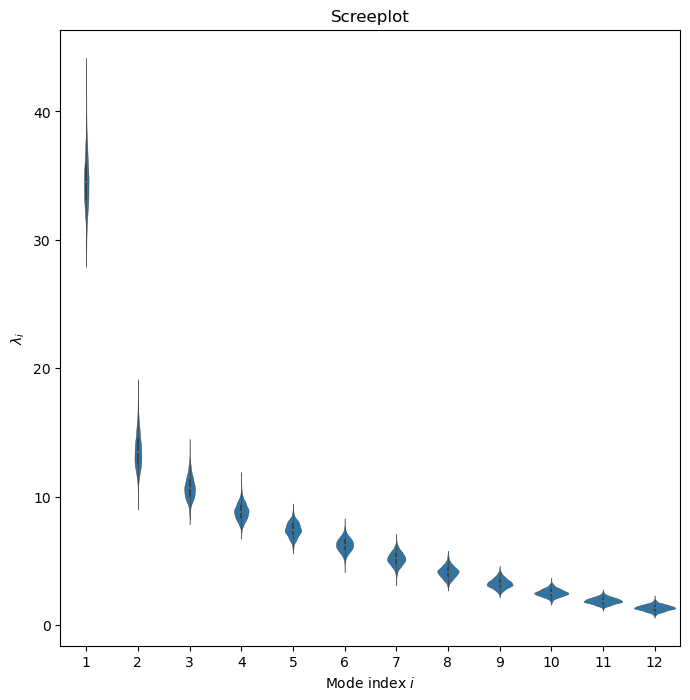

In [10]:
#plotting
fig,ax = megs_pca.screeplot(figsize=(8,8))

Performing spectral analysis on individual series: 100%|██████████| 1000/1000 [00:01<00:00, 860.37it/s]


(5000.0, 3000.0)

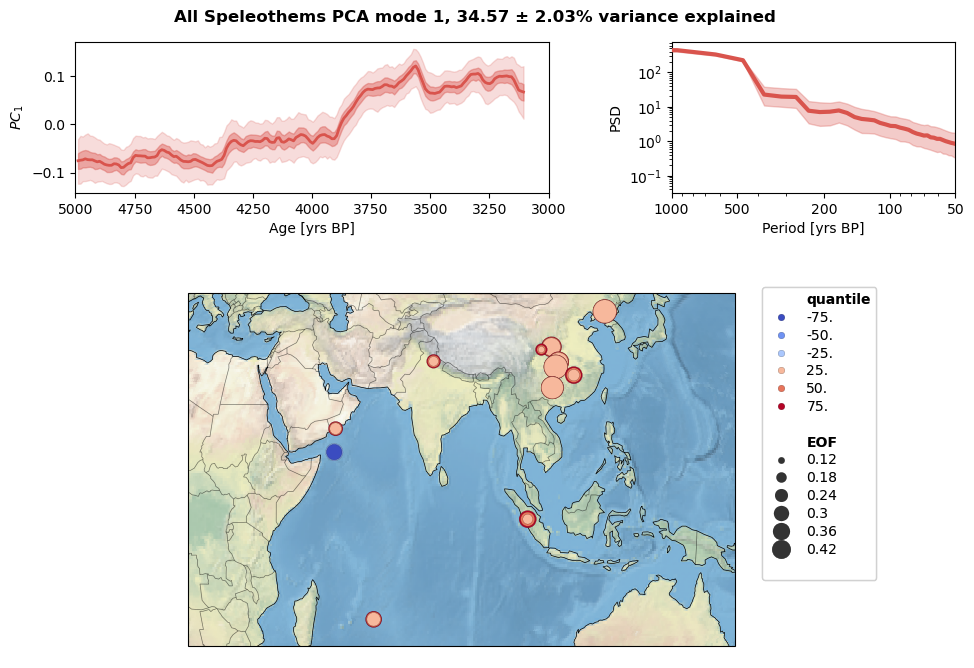

In [11]:
fig,ax = megs_pca.modeplot(index=0,scatter_kwargs={'sizes':(20,300),'linewidth':.1},map_kwargs={'projection':'Mollweide','extent':[20,150,-25,45]})
ax['pc'].set_xlim([5000,3000])

Performing spectral analysis on individual series: 100%|██████████| 1000/1000 [00:01<00:00, 874.65it/s]


(5000.0, 3000.0)

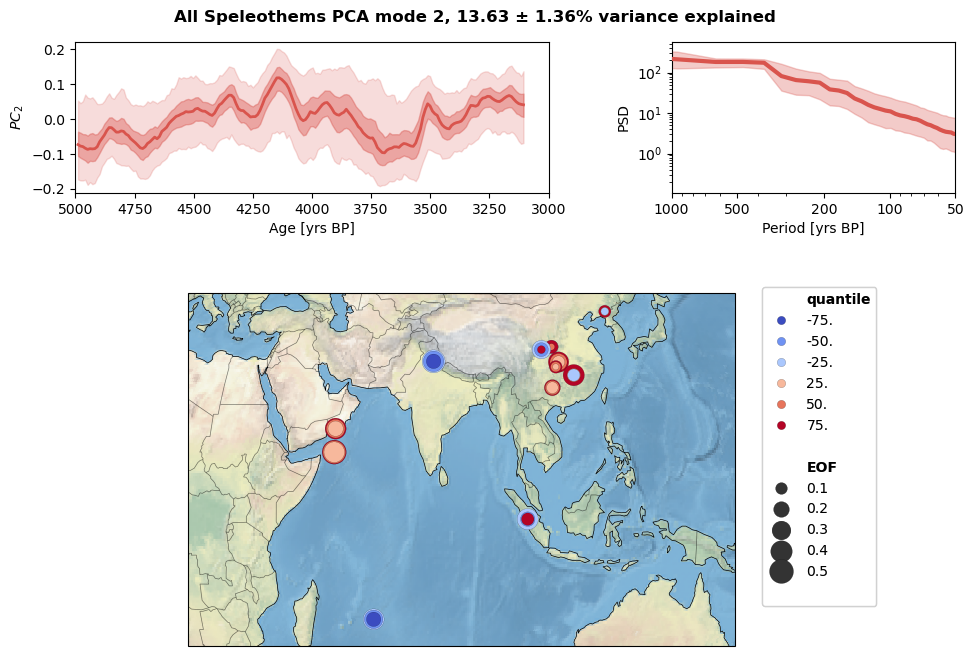

In [12]:
fig,ax = megs_pca.modeplot(index=1,scatter_kwargs={'sizes':(20,300),'linewidth':.1},map_kwargs={'projection':'Mollweide','extent':[20,150,-25,45]})
ax['pc'].set_xlim([5000,3000])

Now just the East Asian speleothems:

In [13]:
megs_ea = pyleo.MulEnsGeoSeries(list(ens_dict[label].interp().slice((3000,5000)) for label in EA_set),label='East Asian Speleothems')

In [14]:
megs_ea_pca = megs_ea.mcpca(seed=42)

Iterating over simulations: 100%|██████████| 1000/1000 [00:02<00:00, 471.18it/s]


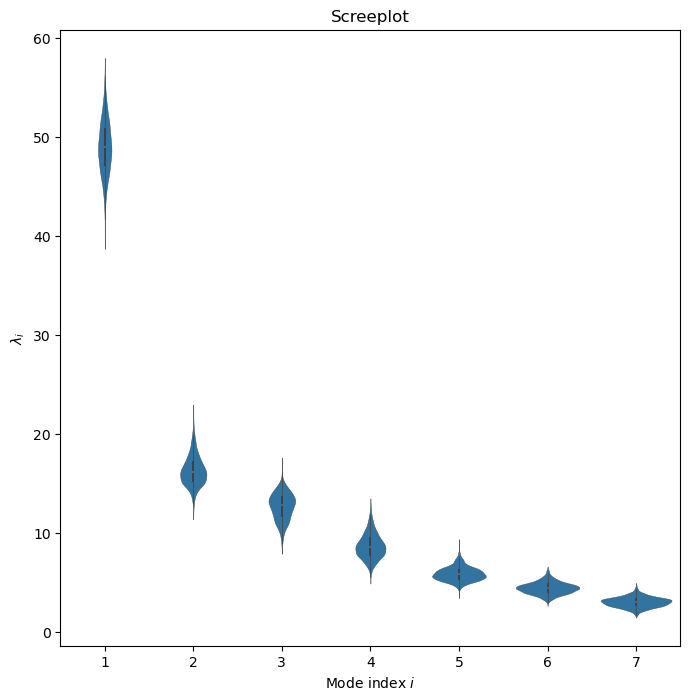

In [15]:
fig,ax = megs_ea_pca.screeplot()

Performing spectral analysis on individual series: 100%|██████████| 1000/1000 [00:01<00:00, 877.50it/s]


(5000.0, 3000.0)

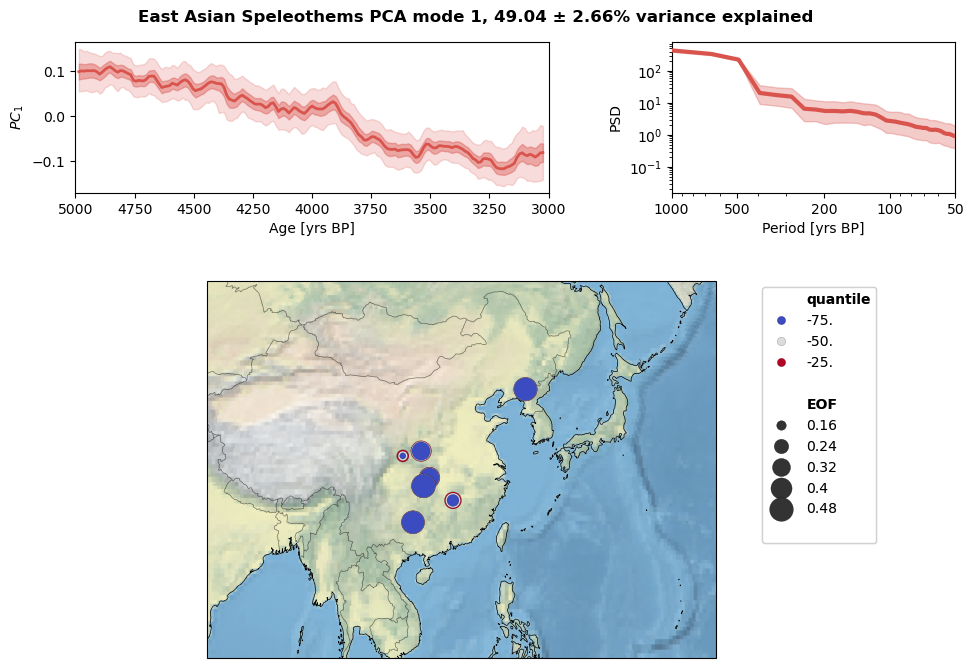

In [16]:
fig,ax = megs_ea_pca.modeplot(index=0,scatter_kwargs={'sizes':(20,300),'linewidth':.1},map_kwargs={'projection':'Mollweide','extent':[80,150,10,55]})
ax['pc'].set_xlim([5000,3000])

Performing spectral analysis on individual series: 100%|██████████| 1000/1000 [00:01<00:00, 897.28it/s]


(5000.0, 3000.0)

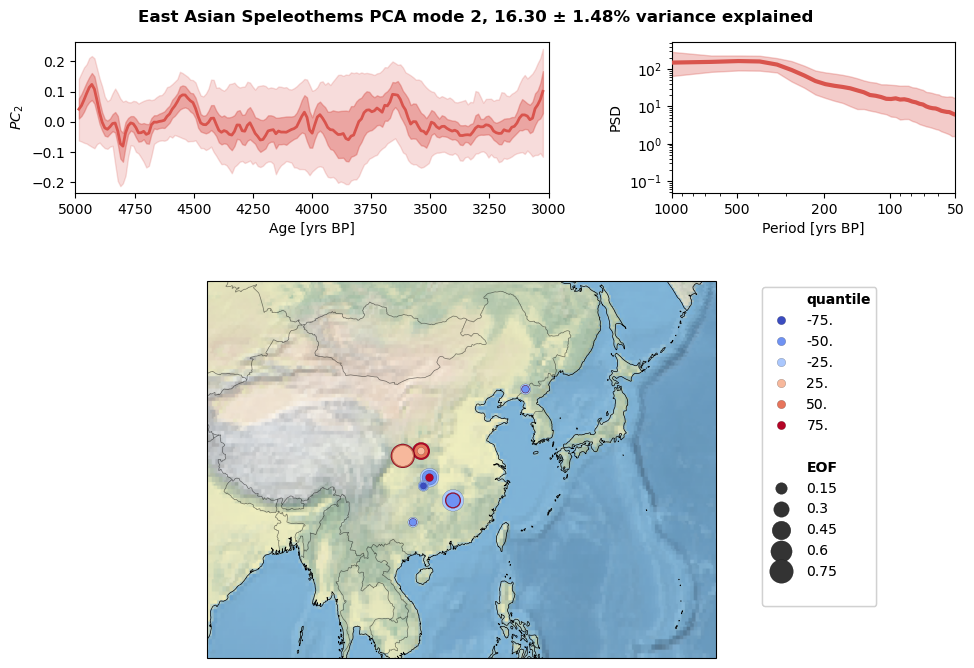

In [17]:
fig,ax = megs_ea_pca.modeplot(index=1,scatter_kwargs={'sizes':(20,300),'linewidth':.1},map_kwargs={'projection':'Mollweide','extent':[80,150,10,55]})
ax['pc'].set_xlim([5000,3000])

Now just the speleothems from around the Indian Ocean Basin:

In [18]:
megs_ib = pyleo.MulEnsGeoSeries(list(ens_dict[label].interp().slice((3000,5000)) for label in IB_set),label='Indian Ocean Basin Speleothems')

In [19]:
megs_ib_pca = megs_ib.mcpca(seed=42)

Iterating over simulations: 100%|██████████| 1000/1000 [00:01<00:00, 536.93it/s]


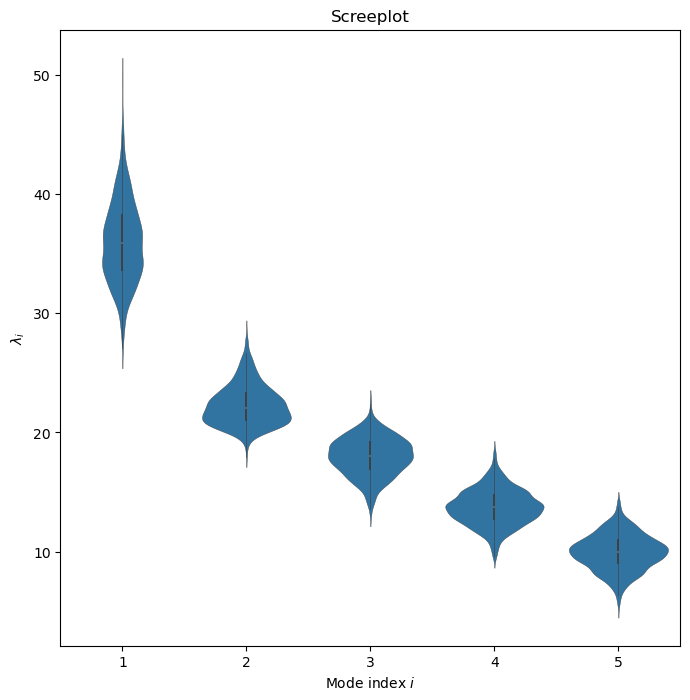

In [20]:
fig,ax = megs_ib_pca.screeplot()

Performing spectral analysis on individual series: 100%|██████████| 1000/1000 [00:01<00:00, 766.83it/s]


(5000.0, 3000.0)

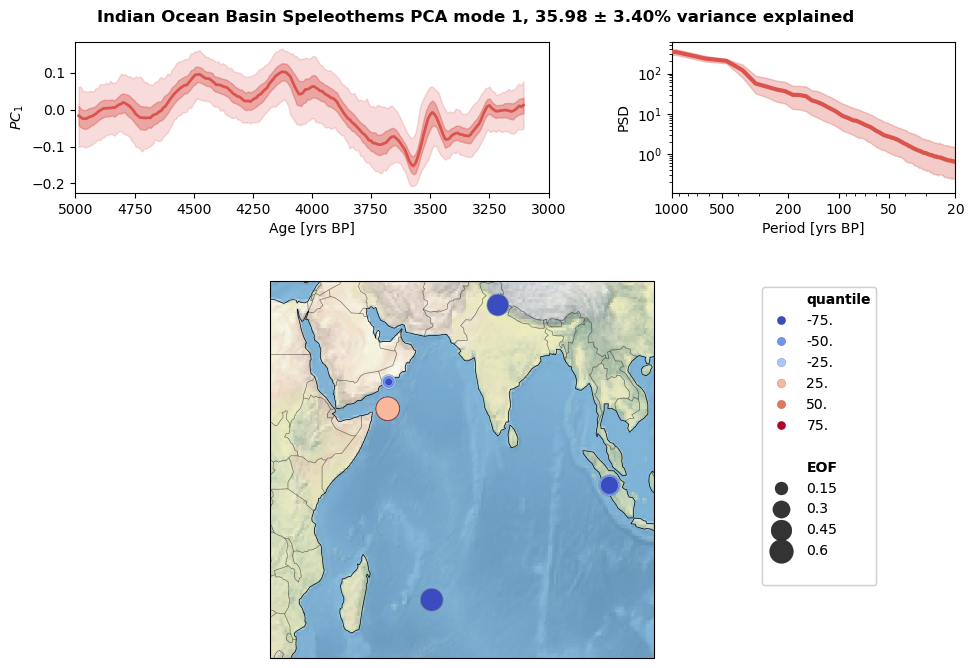

In [21]:
fig,ax = megs_ib_pca.modeplot(index=0,scatter_kwargs={'sizes':(20,300),'linewidth':.1},map_kwargs={'projection':'Mollweide','extent':[30,110,-30,35]})
ax['pc'].set_xlim([5000,3000])

Performing spectral analysis on individual series: 100%|██████████| 1000/1000 [00:01<00:00, 804.39it/s]


(5000.0, 3000.0)

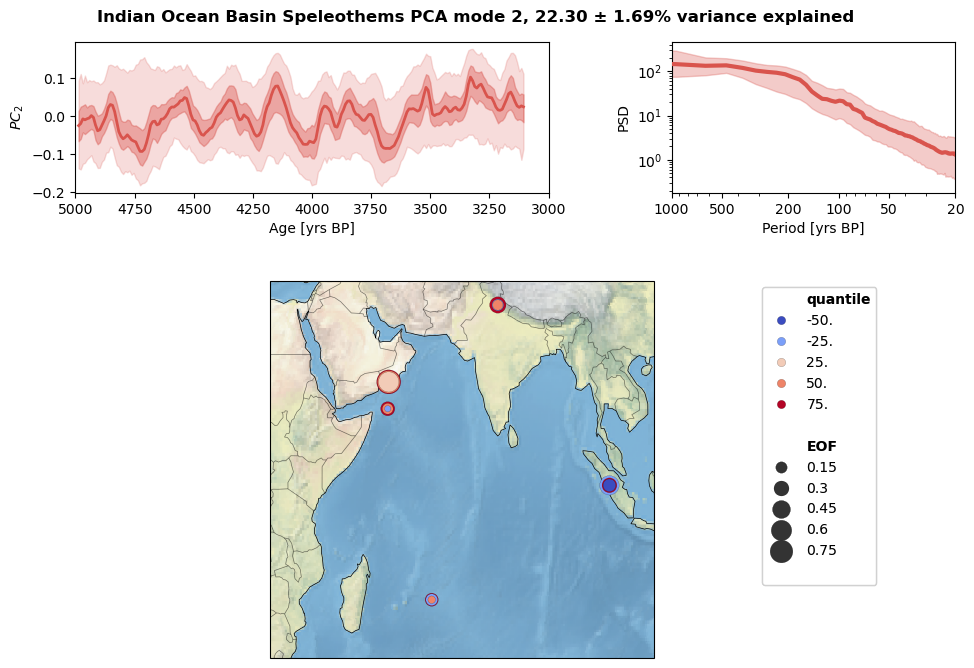

In [22]:
fig,ax = megs_ib_pca.modeplot(index=1,scatter_kwargs={'sizes':(20,300),'linewidth':.1},map_kwargs={'projection':'Mollweide','extent':[30,110,-30,35]})
ax['pc'].set_xlim([5000,3000])